In [ ]:
import pandas as pd

In [ ]:
# Create a DataFrame of states and their tax types as of January 1, 2023
# 0 = No state income tax
# 1 = Flat state income tax rate
# 2 = Nearly flat state income tax rates
# 3 = Progressive state income tax rates
state_taxtype_list = [
    ["Alabama", "AL", 2],
    ["Alaska", "AK", 0],
    ["Arizona", "AZ", 1],
    ["Arkansas", "AR", 3],
    ["California", "CA", 3],
    ["Colorado", "CO", 1],
    ["Connecticut", "CT", 3],
    ["Delaware", "DE", 3],
    ["District of Columbia", "DC", 3],
    ["Florida", "FL", 0],
    ["Georgia", "GA", 2],
    ["Hawaii", "HI", 3],
    ["Idaho", "ID", 1],
    ["Illinois", "IL", 1],
    ["Indiana", "IN", 1],
    ["Iowa", "IA", 2],
    ["Kansas", "KS", 3],
    ["Kentucky", "KY", 1],
    ["Louisiana", "LA", 3],
    ["Maine", "ME", 3],
    ["Maryland", "MD", 3],
    ["Massachusetts", "MA", 1],
    ["Michigan", "MI", 1],
    ["Minnesota", "MN", 3],
    ["Mississippi", "MS", 1],
    ["Missouri", "MO", 2],
    ["Montana", "MT", 3],
    ["Nebraska", "NE", 3],
    ["Nevada", "NV", 0],
    ["New Hampshire", "NH", 0],
    ["New Jersey", "NJ", 3],
    ["New Mexico", "NM", 3],
    ["New York", "NY", 3],
    ["North Carolina", "NC", 1],
    ["North Dakota", "ND", 3],
    ["Ohio", "OH", 3],
    ["Oklahoma", "OK", 2],
    ["Oregon", "OR", 3],
    ["Pennsylvania", "PA", 1],
    ["Rhode Island", "RI", 3],
    ["South Carolina", "SC", 3],
    ["South Dakota", "SD", 0],
    ["Tennessee", "TN", 0],
    ["Texas", "TX", 0],
    ["Utah", "UT", 1],
    ["Virginia", "VA", 3],
    ["Vermont", "VT", 3],
    ["Washington", "WA", 0],
    ["West Virginia", "WV", 3],
    ["Wisconsin", "WI", 3],
    ["Wyoming", "WY", 0],
]
state_taxtype_df = pd.DataFrame(
    state_taxtype_list, columns=["State", "Abbrev", "TaxType"]
)

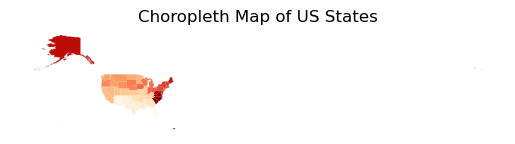

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the U.S. state boundaries GeoJSON file
us_states = gpd.read_file('gz_2010_us_040_00_500k.json')

#us_states = us_states[~us_states['NAME'].isin(['Alaska', 'Hawaii'])]
#plt.figure(figsize=(12, 8))
# Plot the choropleth map
us_states.plot(column='geometry', cmap='OrRd', legend=False)
plt.title('Choropleth Map of US States')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Import packages
import pandas as pd
import numpy as np
from bokeh.io import output_file, output_notebook, export_png
from bokeh.plotting import figure, show
from bokeh.models import (ColumnDataSource, Title, Label, LabelSet, Legend,
                          LegendItem, CategoricalColorMapper, ColorBar,
                          HoverTool, NumeralTickFormatter, GeoJSONDataSource,
                          FactorRange)
from bokeh.models.tickers import SingleIntervalTicker
from bokeh.transform import factor_cmap
from bokeh.sampledata.us_states import data as states
from bokeh.palettes import Category10

import random
import json
import geopandas as gpd

In [ ]:
# Create a DataFrame of states and their tax types as of January 1, 2023
# 0 = No state income tax
# 1 = Flat state income tax rate
# 2 = Nearly flat state income tax rates
# 3 = Progressive state income tax rates
state_taxtype_list = [
    ["Alabama", "AL", 2],
    ["Alaska", "AK", 0],
    ["Arizona", "AZ", 1],
    ["Arkansas", "AR", 3],
    ["California", "CA", 3],
    ["Colorado", "CO", 1],
    ["Connecticut", "CT", 3],
    ["Delaware", "DE", 3],
    ["District of Columbia", "DC", 3],
    ["Florida", "FL", 0],
    ["Georgia", "GA", 2],
    ["Hawaii", "HI", 3],
    ["Idaho", "ID", 1],
    ["Illinois", "IL", 1],
    ["Indiana", "IN", 1],
    ["Iowa", "IA", 2],
    ["Kansas", "KS", 3],
    ["Kentucky", "KY", 1],
    ["Louisiana", "LA", 3],
    ["Maine", "ME", 3],
    ["Maryland", "MD", 3],
    ["Massachusetts", "MA", 1],
    ["Michigan", "MI", 1],
    ["Minnesota", "MN", 3],
    ["Mississippi", "MS", 1],
    ["Missouri", "MO", 2],
    ["Montana", "MT", 3],
    ["Nebraska", "NE", 3],
    ["Nevada", "NV", 0],
    ["New Hampshire", "NH", 0],
    ["New Jersey", "NJ", 3],
    ["New Mexico", "NM", 3],
    ["New York", "NY", 3],
    ["North Carolina", "NC", 1],
    ["North Dakota", "ND", 3],
    ["Ohio", "OH", 3],
    ["Oklahoma", "OK", 2],
    ["Oregon", "OR", 3],
    ["Pennsylvania", "PA", 1],
    ["Rhode Island", "RI", 3],
    ["South Carolina", "SC", 3],
    ["South Dakota", "SD", 0],
    ["Tennessee", "TN", 0],
    ["Texas", "TX", 0],
    ["Utah", "UT", 1],
    ["Virginia", "VA", 3],
    ["Vermont", "VT", 3],
    ["Washington", "WA", 0],
    ["West Virginia", "WV", 3],
    ["Wisconsin", "WI", 3],
    ["Wyoming", "WY", 0],
]
state_taxtype_df = pd.DataFrame(
    state_taxtype_list, columns=["State", "Abbrev", "TaxType"]
)
state_taxtype_df["TaxType_str"] = ""
state_taxtype_df["TaxType_str"][state_taxtype_df["TaxType"]==0] = \
    "No state labor income tax"
state_taxtype_df["TaxType_str"][state_taxtype_df["TaxType"]==1] = \
    "Flat state income tax rate"
state_taxtype_df["TaxType_str"][state_taxtype_df["TaxType"]==2] = \
    "Nearly flat state income tax rates"
state_taxtype_df["TaxType_str"][state_taxtype_df["TaxType"]==3] = \
    "Progressive state income tax rates"
state_taxtype_df["TaxType_str_short"] = ""
state_taxtype_df["TaxType_str_short"][state_taxtype_df["TaxType"]==0] = \
    "No income tax"
state_taxtype_df["TaxType_str_short"][state_taxtype_df["TaxType"]==1] = \
    "Flat income tax rate"
state_taxtype_df["TaxType_str_short"][state_taxtype_df["TaxType"]==2] = \
    "Nearly flat income tax rates"
state_taxtype_df["TaxType_str_short"][state_taxtype_df["TaxType"]==3] = \
    "Progressive income tax rates"
state_taxtype_df["fill_color"] = ""
state_taxtype_df["fill_color"][state_taxtype_df["TaxType"]==0] = "white"
state_taxtype_df["fill_color"][state_taxtype_df["TaxType"]==1] = "red"
state_taxtype_df["fill_color"][state_taxtype_df["TaxType"]==2] = "purple"
state_taxtype_df["fill_color"][state_taxtype_df["TaxType"]==3] = "blue"

# Sort alphabetically by full state name
state_taxtype_df.sort_values("State", inplace=True, ignore_index=True)

# Create sub-DataFrames for each tax type
no_tax_states_df = \
    state_taxtype_df[state_taxtype_df["TaxType"]==0].reset_index(drop=True)
flat_tax_states_df = \
    state_taxtype_df[state_taxtype_df["TaxType"]==1].reset_index(drop=True)
nflat_tax_states_df = \
    state_taxtype_df[state_taxtype_df["TaxType"]==2].reset_index(drop=True)
prog_tax_states_df = \
    state_taxtype_df[state_taxtype_df["TaxType"]==3].reset_index(drop=True)
print(state_taxtype_df.groupby("TaxType").count())

# Save state_data_df as .csv
state_taxtype_df.to_csv('state_taxtype.csv', index=False)
state_taxtype_df

In [ ]:
fig1_title = "Type of state income tax system as of January 2023"
output_file(
    "state_taxtype_2023.html", title=fig1_title, mode='inline'
)
output_notebook()

# Download U.S. states shape files from US Census Bureau
# https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html
us_shapefile_path = ("https://github.com/TheCGO/KS-FlatTax/raw/main/data/" +
                     "cb_2018_us_state_20m/cb_2018_us_state_20m.shp")
gdf = gpd.GeoDataFrame.from_file(us_shapefile_path)
gdf_json = gdf.to_json()
gjson = json.loads(gdf_json)

# Remove Puerto Rico from data
del(gjson["features"][7])

# Alaska
# Fix positive longitudes
min_lat_ak = 180  # initial value that will be adjusted
min_abs_lon_ak = 180  # initial value that will be adjusted
coords_list = gjson["features"][24]["geometry"]["coordinates"]
for ind_isl, island in enumerate(coords_list):
    for ind_pnt, point in enumerate(island[0]):
        min_lat_ak = np.minimum(min_lat_ak, point[1])
        if point[0] > 0:
            gjson["features"][24]["geometry"][
                "coordinates"
            ][ind_isl][0][ind_pnt][0] = -180 - (180 - point[0])
        else:
            min_abs_lon_ak = np.minimum(min_abs_lon_ak, -point[0])

# Shrink the size of Alaska relative to its southestern most minimum lattitude
# and longitude
shrink_pct_ak = 0.65
coords_list_ak = gjson["features"][24]["geometry"]["coordinates"]
for ind_isl, island in enumerate(coords_list_ak):
    for ind_pnt, point in enumerate(island[0]):
        gjson["features"][24]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][0] = point[0] - shrink_pct_ak * (point[0] +
                                                                min_abs_lon_ak)
        gjson["features"][24]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][1] = point[1] - shrink_pct_ak * (point[1] -
                                                                min_lat_ak)

# Move Alaska closer to the mainland such that the minimum minimum absolute
# longitude and lattitude are (-127, 44)
min_lat_ak_new = 44
min_abs_lon_ak_new = 127
for ind_isl, island in enumerate(coords_list):
    for ind_pnt, point in enumerate(island[0]):
        gjson["features"][24]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][0] = point[0] + (min_abs_lon_ak -
                                                min_abs_lon_ak_new)
        gjson["features"][24]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][1] = point[1] - (min_lat_ak - min_lat_ak_new)

# Hawaii
list_ind_hi = 47
# Get minimum lattitude and minimum absolute longitude for Hawaii
min_lat_hi = 180  # initial value that will be adjusted
min_abs_lon_hi = 180  # initial value that will be adjusted
coords_list = gjson["features"][list_ind_hi]["geometry"]["coordinates"]
for ind_isl, island in enumerate(coords_list):
    for ind_pnt, point in enumerate(island[0]):
        min_lat_hi = np.minimum(min_lat_hi, point[1])
        min_abs_lon_hi = np.minimum(min_abs_lon_hi, -point[0])
# print("Minimum lattitude for Hawaii is", min_lat_hi)
# print("Minimum absolute longitude for Hawaii is", min_abs_lon_hi)

# Increase the size of Hawaii
incr_pct_hi = 0.4
coords_list_hi = gjson["features"][list_ind_hi]["geometry"]["coordinates"]
for ind_isl, island in enumerate(coords_list_hi):
    for ind_pnt, point in enumerate(island[0]):
        gjson["features"][list_ind_hi]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][0] = point[0] + incr_pct_hi * (point[0] +
                                                              min_abs_lon_hi)
        gjson["features"][list_ind_hi]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][1] = point[1] + incr_pct_hi * (point[1] -
                                                              min_lat_hi)

# Move Hawaii closer to the mainland such that the minimum minimum absolute
# longitude and lattitude are (-125, 27)
min_lat_hi_new = 27.5
min_abs_lon_hi_new = 124.5
for ind_isl, island in enumerate(coords_list):
    for ind_pnt, point in enumerate(island[0]):
        gjson["features"][list_ind_hi]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][0] = point[0] + (min_abs_lon_hi -
                                                min_abs_lon_hi_new)
        gjson["features"][list_ind_hi]["geometry"][
            "coordinates"
        ][ind_isl][0][ind_pnt][1] = point[1] - (min_lat_hi - min_lat_hi_new)

# Add a state box around Delaware abbreviation DE
st_list_num = 2
de_coord_list = [gjson["features"][st_list_num]["geometry"]["coordinates"]]
new_box_de = [[
    [-75.4, 38.8],
    [-72.4, 38.3],
    [-72.4, 38.9],
    [-70.2, 38.9],
    [-70.2, 37.7],
    [-72.4, 37.7],
    [-72.4, 38.3]
]]
de_coord_list.append(new_box_de)
gjson["features"][st_list_num]["geometry"]["coordinates"] = de_coord_list
gjson["features"][st_list_num]["geometry"]["type"] = "MultiPolygon"

# Add a state box around Washington, DC (District of Columbia) abbreviation DC
st_list_num = 35
dc_coord_list = [gjson["features"][st_list_num]["geometry"]["coordinates"]]
new_box_dc = [[
    [-77.0, 38.9],
    [-73.3, 35.5],
    [-73.3, 36.1],
    [-71.1, 36.1],
    [-71.1, 34.9],
    [-73.3, 34.9],
    [-73.3, 35.5]
]]
dc_coord_list.append(new_box_dc)
gjson["features"][st_list_num]["geometry"]["coordinates"] = dc_coord_list
gjson["features"][st_list_num]["geometry"]["type"] = "MultiPolygon"

# Add a state box around Massachusetts abbreviation MD
st_list_num = 0
md_coord_list = gjson["features"][st_list_num]["geometry"]["coordinates"]
new_box_md = [[
    [-76.8, 39.3],
    [-72.7, 37.0],
    [-72.7, 37.6],
    [-70.5, 37.6],
    [-70.5, 36.4],
    [-72.7, 36.4],
    [-72.7, 37.0]
]]
md_coord_list.append(new_box_md)
gjson["features"][st_list_num]["geometry"]["coordinates"] = md_coord_list

# Add a state box around Massachusetts abbreviation MA
st_list_num = 29
ma_coord_list = gjson["features"][st_list_num]["geometry"]["coordinates"]
new_box_ma = [[
    [-71.7, 42.2],
    [-68.5, 42.2],
    [-68.5, 42.8],
    [-66.3, 42.8],
    [-66.3, 41.6],
    [-68.5, 41.6],
    [-68.5, 42.2]
]]
ma_coord_list.append(new_box_ma)
gjson["features"][st_list_num]["geometry"]["coordinates"] = ma_coord_list

# Add a state box around New Jersey abbreviation NJ
st_list_num = 34
nj_coord_list = [gjson["features"][st_list_num]["geometry"]["coordinates"]]
new_box_nj = [[
    [-74.4, 40.1],
    [-72.0, 39.7],
    [-72.0, 40.3],
    [-69.8, 40.3],
    [-69.8, 39.1],
    [-72.0, 39.1],
    [-72.0, 39.7]
]]
nj_coord_list.append(new_box_nj)
gjson["features"][st_list_num]["geometry"]["coordinates"] = nj_coord_list
gjson["features"][st_list_num]["geometry"]["type"] = "MultiPolygon"

# Add a state box around Rhode Island abbreviation RI
st_list_num = 50
ri_coord_list = gjson["features"][st_list_num]["geometry"]["coordinates"]
new_box_ri = [[
    [-71.5, 41.7],
    [-69.5, 40.4],
    [-69.5, 41.0],
    [-67.3, 41.0],
    [-67.3, 39.8],
    [-69.5, 39.8],
    [-69.5, 40.4]
]]
ri_coord_list.append(new_box_ri)
gjson["features"][st_list_num]["geometry"]["coordinates"] = ri_coord_list

# Merge the state tax type data into gjson for each state
state_taxtype_df
for ind_st, state in enumerate(gjson["features"]):
    st_abbrev = state["properties"]["STUSPS"]
    state["properties"]["tax_type"] = state_taxtype_df[
        state_taxtype_df["Abbrev"]==st_abbrev
    ]["TaxType_str_short"].iloc[0]

tax_type_labels = [
    'No income tax', 'Flat income tax rate', 'Nearly flat income tax rates',
    'Progressive income tax rates'
]
tax_type_colors = ["white", "red", "purple", "blue"]

source_shapes = {}
for category in tax_type_labels:
    source_shapes[category] = {"type": "FeatureCollection", "features": []}

for item in gjson["features"]:
    source_shapes[item["properties"]["tax_type"]]['features'].append(item)

TOOLS = "pan, box_zoom, wheel_zoom, hover, save, reset"

fig1 = figure(
    title=fig1_title,
    height=500,
    width=1050,
    tools=TOOLS,
    # tooltips=[
    #     ("State", @state_names), ("Tax type", @tax_type)
    # ]
    # match_aspect = True,
    min_border = 0,
    x_axis_location = None, y_axis_location = None,
    toolbar_location="right"
)
fig1.grid.grid_line_color = None

cmap = CategoricalColorMapper(
    palette=tax_type_colors, factors=tax_type_labels
)
for category in tax_type_labels:
    source_shape_1 = GeoJSONDataSource(
        geojson = json.dumps(source_shapes[category])
    )
    fig1.patches(
        'xs', 'ys', source=source_shape_1, fill_alpha=0.7,
        fill_color = {'field': 'tax_type', 'transform': cmap},
        line_color ='black', line_width=1.0, line_alpha=0.3,
        hover_line_color="black", hover_line_width=3.0, legend_label=category)

    hover = fig1.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("State", "@NAME"),
        ("Tax type", "@tax_type")
    ]

# Add 2-letter state abbreviation labels. See Bokeh documentation for labels at
# https://docs.bokeh.org/en/latest/docs/user_guide/basic/annotations.html.
label_lon_lat =[
    ["AL",  -87.40, 32.10],
    ["AK", -135.00, 48.30],
    ["AZ", -112.40, 34.00],
    ["AR",  -93.20, 34.30],
    ["CA", -121.00, 37.00],
    ["CO", -106.50, 38.50],
    ["CT",  -73.40, 41.15],
    ["DE",  -72.10, 37.80],
    ["DC",  -73.00, 35.00],
    ["FL",  -82.40, 28.00],
    ["GA",  -84.20, 32.20],
    ["HI", -125.00, 29.00],
    ["ID", -115.00, 43.00],
    ["IL",  -89.60, 39.50],
    ["IN",  -86.90, 39.60],
    ["IA",  -94.40, 41.60],
    ["KS",  -99.50, 38.00],
    ["KY",  -86.00, 37.00],
    ["LA",  -93.00, 30.20],
    ["ME",  -70.00, 44.50],
    ["MD",  -72.40, 36.50],
    ["MA",  -68.20, 41.80],
    ["MI",  -85.40, 42.70],
    ["MN",  -95.30, 45.50],
    ["MS",  -90.60, 32.10],
    ["MO",  -93.50, 38.00],
    ["MT", -110.50, 46.50],
    ["NE", -100.50, 41.00],
    ["NV", -118.00, 39.00],
    ["NH",  -72.45, 42.70],
    ["NM", -107.00, 34.00],
    ["NJ",  -71.60, 39.20],
    ["NY",  -76.00, 42.50],
    ["NC",  -79.20, 35.00],
    ["ND", -101.50, 46.80],
    ["OH",  -83.80, 39.90],
    ["OK",  -98.00, 35.00],
    ["OR", -121.50, 43.50],
    ["PA",  -78.50, 40.40],
    ["RI",  -69.00, 39.90],
    ["SC",  -81.50, 33.30],
    ["SD", -101.00, 44.00],
    ["TN",  -87.10, 35.40],
    ["TX", -100.00, 31.00],
    ["UT", -112.50, 39.00],
    ["VT",  -73.20, 44.10],
    ["VA",  -79.00, 37.10],
    ["WA", -121.00, 47.00],
    ["WV",  -81.90, 38.00],
    ["WI",  -90.40, 44.00],
    ["WY", -108.50, 42.50]
]
label_abbrev = [state[0] for state in label_lon_lat]
label_lon = [state[1] for state in label_lon_lat]
label_lat = [state[2] for state in label_lon_lat]
state_cds = ColumnDataSource(data=dict(
    lon=label_lon,
    lat=label_lat,
    abbrev=label_abbrev
))

state_labels = LabelSet(
    x='lon', y='lat', text='abbrev', text_font_size="9pt",
    text_font_style="bold", x_offset=0, y_offset=0, source=state_cds
)

fig1.add_layout(state_labels)

# Legend properties
fig1.legend.click_policy = 'mute'
fig1.legend.location = "center_left"

fig1.add_layout(
    Title(
        text="  Source: Richard W. Evans (@RickEcon), updated June 8, 2023.",
        align="left",
        text_font_size="3mm",
        text_font_style="italic",
    ),
    "below"
)

In [ ]:
show(fig1)